In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [38]:
df=pd.read_csv('data.csv')

In [39]:
df.head(20)

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases
5,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_discarded,AR0006,NaN,NaN,0,cases
6,2016-03-19,Argentina-CABA,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
7,2016-03-19,Argentina-CABA,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
8,2016-03-19,Argentina-CABA,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,9,cases
9,2016-03-19,Argentina-CABA,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,0,cases


# solutions

# 1 show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration

In [61]:
y=df[df.location=='Argentina-Catamarca']    #having desired loc

In [31]:
h=y[y.data_field_code=='AR0005']           #having desired code

In [32]:
a=h.value.unique()

In [40]:
a                                          #unique values

array(['14', '15', '16'], dtype=object)

In [33]:
z=h[['report_date','value']].copy()

In [34]:
z                          #data field code values for  entire duration

,report_date,value
16,2016-03-19,14
160,2016-03-26,15
304,2016-04-02,15
448,2016-04-09,15
592,2016-04-16,15
736,2016-04-29,15
880,2016-05-07,16
1024,2016-05-14,15
1168,2016-05-22,16
1312,2016-05-30,15


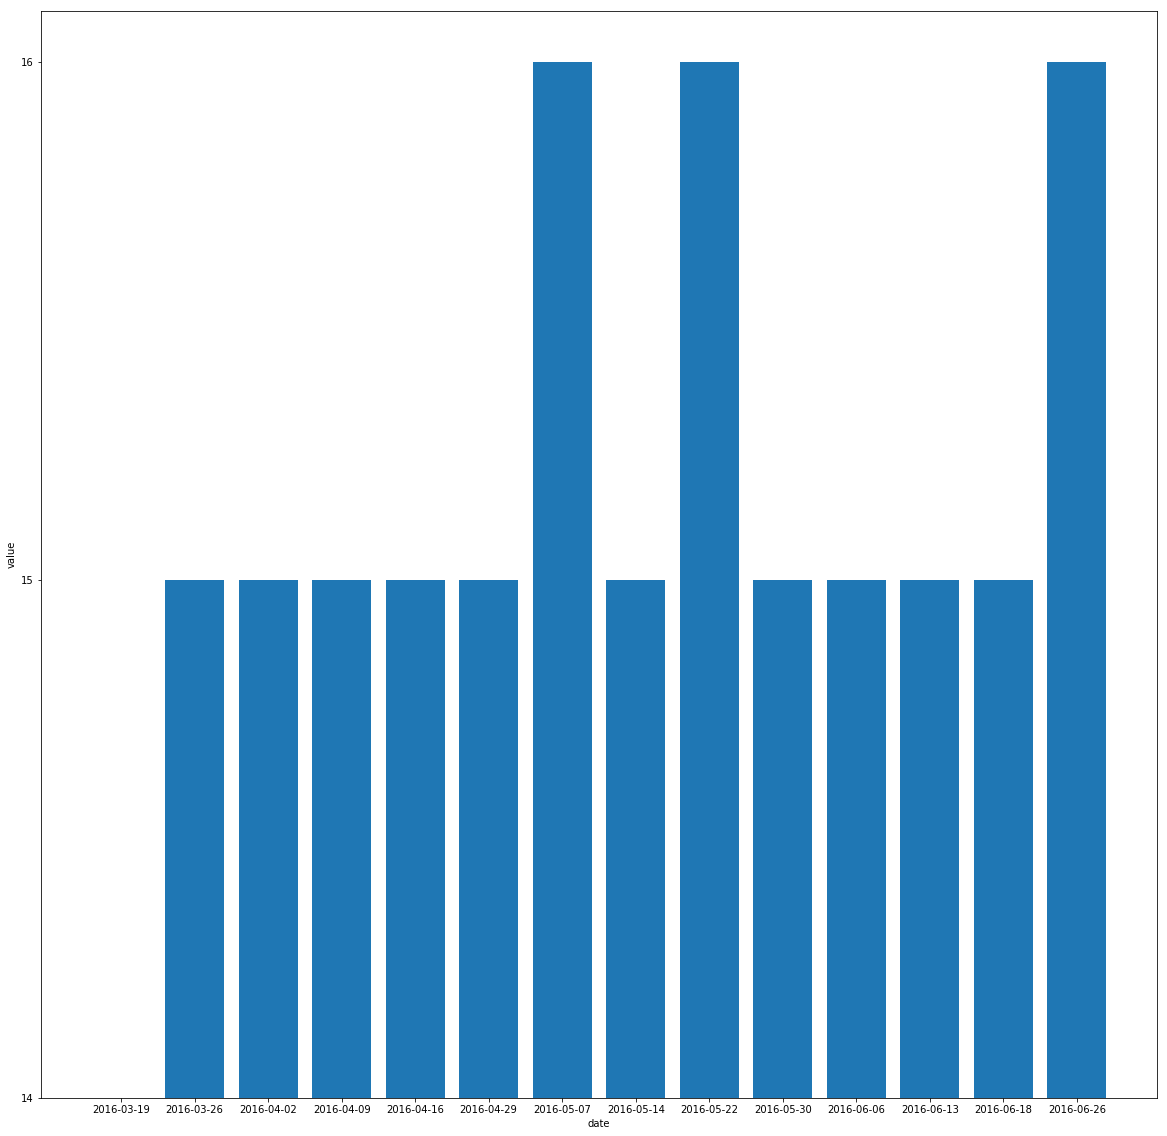

In [35]:
plt.figure(figsize=(20,20))
plt.bar(z.report_date,z.value)
plt.xlabel('date')
plt.ylabel('value')
plt.show()                              #required graph

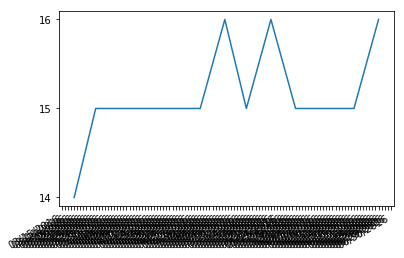

In [44]:
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in z.report_date]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x,z.value)
plt.gcf().autofmt_xdate()               #if we need variation

# 2 Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference.

In [63]:
z=df[df.unit=='cases']

In [64]:
x=z[z.location=='Argentina-CABA']

In [65]:
y= z[z.location=='Argentina-Catamarca']

In [77]:
x.value.unique()

array(['0', '9', '68', '1', '81', '2', '83', '86', '87', '90', '8', '245',
       '115', '250', '121', '123', '125', '149'], dtype=object)

In [12]:
y.value.unique()

array(['0', '14', '15', '16'], dtype=object)

In [76]:
"""plt.figure(figsize=(20,20))
#ax=plt.subplot(111)
plt.bar(y.report_date,y.value,color='red')
plt.bar(x.report_date,x.value)
plt.xlabel('date')
plt.ylabel('value')
plt.legend()
plt.show()   """                          

"plt.figure(figsize=(20,20))\n#ax=plt.subplot(111)\nplt.bar(y.report_date,y.value,color='red')\nplt.bar(x.report_date,x.value)\nplt.xlabel('date')\nplt.ylabel('value')\nplt.legend()\nplt.show()   "

In [72]:
x1=x.value
y1=y.value

In [73]:
x2=x1.sum(axis=0,skipna=True)
y2=y1.sum(axis=0,skipna=True)
t=0

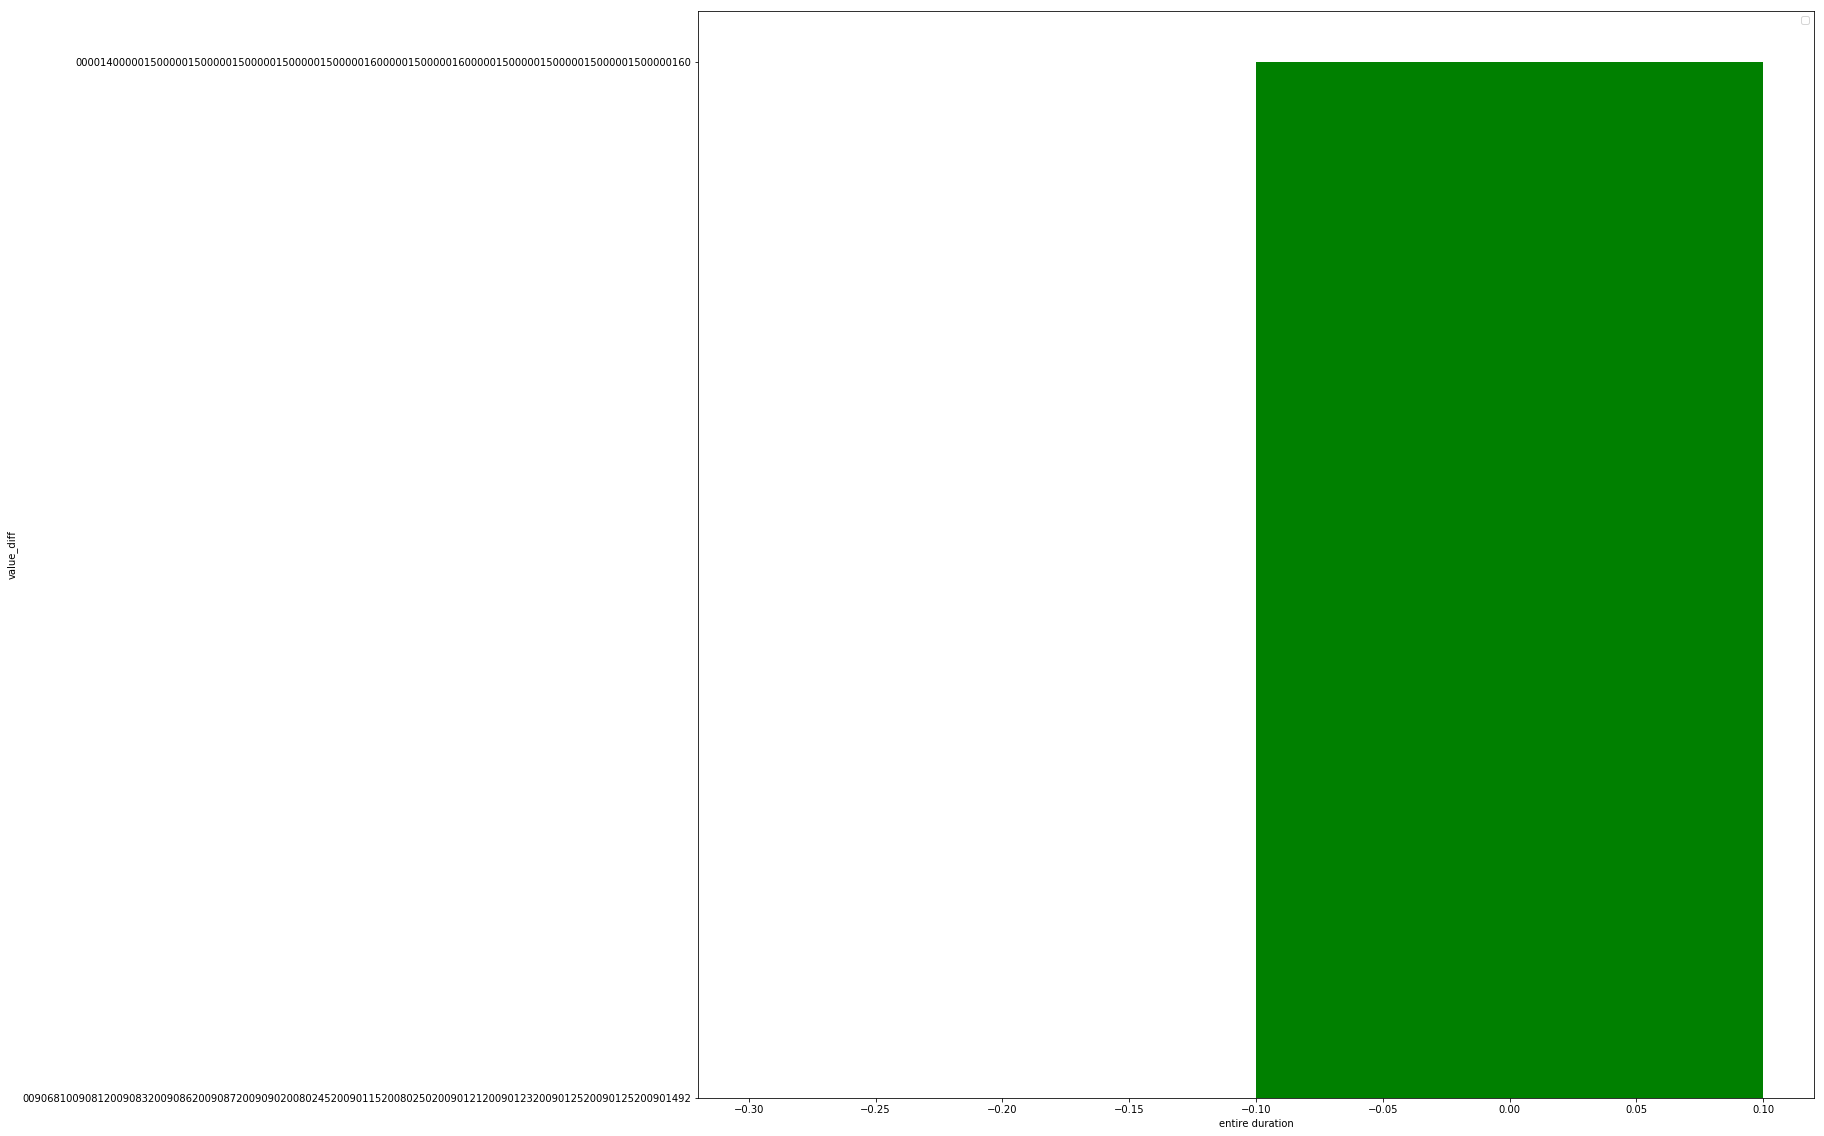

In [78]:
plt.figure(figsize=(20,20))
ax=plt.subplot(111)
ax.bar(t-0.2,x2,width=0.2,color='b')
ax.bar(t,y2,width=0.2,color='g')
plt.xlabel('entire duration')
plt.ylabel('value_diff')
plt.legend()
plt.show()                          #plot showing diff b/w sum of values

# 3.Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'

In [82]:
a=df[df.location=='Argentina-Buenos_Aires']
y=df[df.location=='Argentina-CABA']
z=df[df.location=='Argentina-Catamarca']

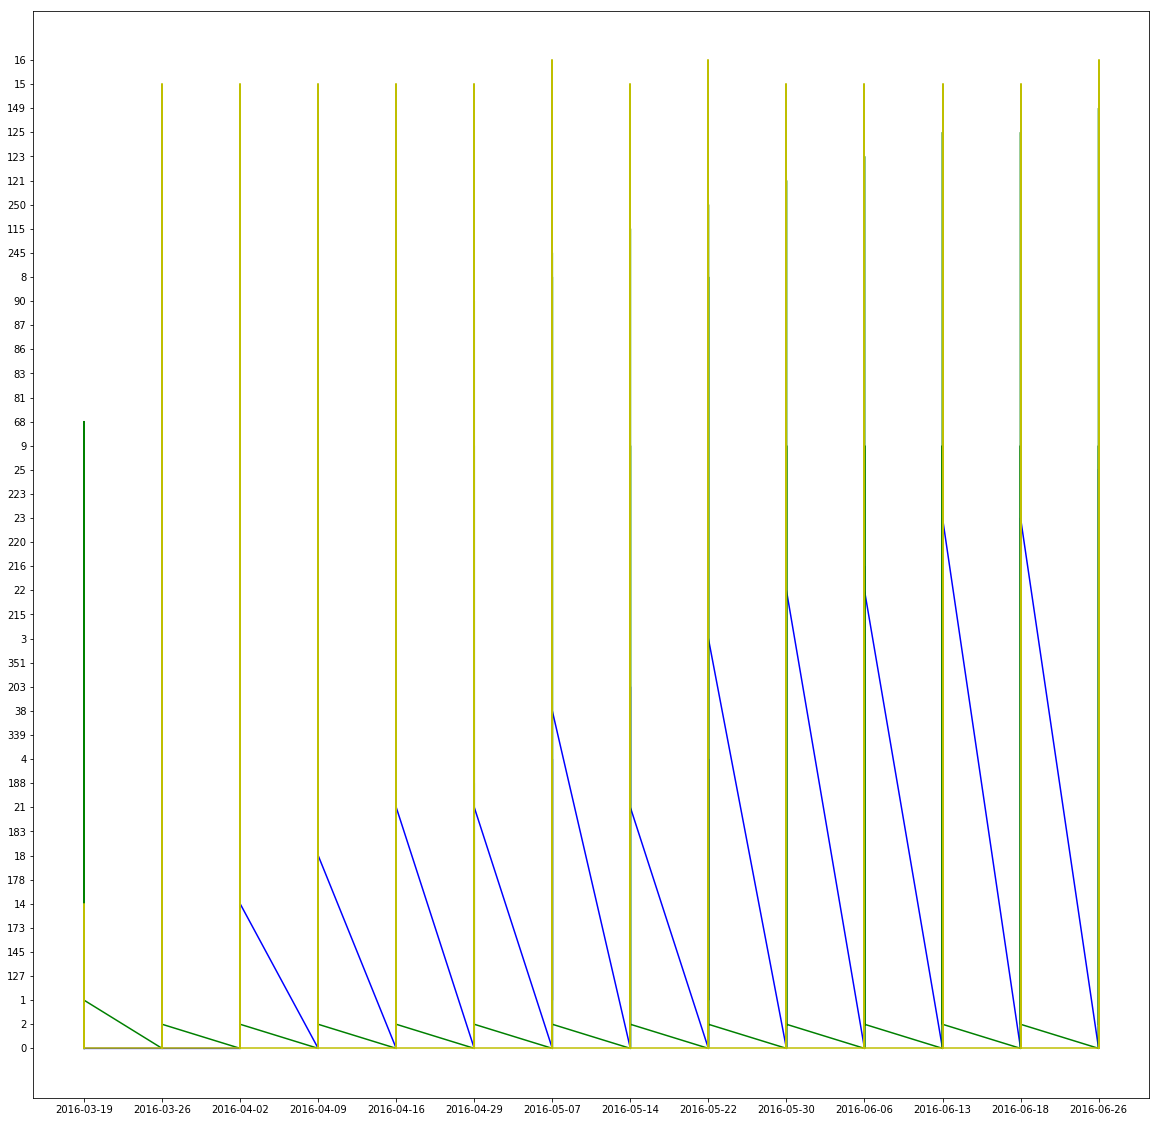

In [100]:
plt.figure(figsize=(20,20))
plt.plot(a.report_date,a.value,label='buenos',color='b')
plt.plot(y.report_date,y.value,label='caba',color='g')
plt.plot(z.report_date,z.value,label='catamarca',color='y')
plt.show()

# 4. Build a program to predict the correct word for wrongly typed word. for example whst => what, numbr =>number, good => good

In [1]:
value=raw_input("enter word: ")
value

enter word: helo


'helo'

In [2]:
dictionary=set()

def read_dictionary_file():
    global dictionary
    if dictionary:
        return
    with open('words.txt',"r") as f:
            contents=f.read()
            
    dictionary=set(
            word.lower()
            for word in contents.splitlines()
    )
    
def is_spelled_correctly(word):
    word=word.lower()
    read_dictionary_file()
    return word in dictionary

In [3]:
print(is_spelled_correctly(value))  #to check whether entered word is correct

False
